<a href="https://colab.research.google.com/github/Gautam0507/ECE304-Assignments/blob/main/Assignment-4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Done By

Name: N Gautam
Roll No: 2210110411

Name: Risshi Kamalesh K
Roll No: 2210110511

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [27]:
data = pd.read_csv('Data.csv', header=None).values
print("Data Size", data.shape)
n = data.shape[0]

Data Size (9999, 2)


# Question 1

## MLE Derivation for μ

Given:
- Conditional distribution: $\Pr(x_1, x_2,\ldots, x_m|\mu)=\prod_{i=1}^{m}\frac{1}{\sqrt{2\pi \det(\Lambda)}} \exp\left(\frac{-(x_i - \mu)^T \Lambda^{-1}(x_i - \mu)}{2}\right)$
- Where $x_i = [x_i(1), x_i(2)]$, $i = 1, \ldots, m$
- $\mu = [\mu_1, \mu_2]$
- $\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix}$

The likelihood function is:

$$L(\mu) = \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi \det(\Lambda)}} \exp\left(\frac{-(x_i - \mu)^T \Lambda^{-1}(x_i - \mu)}{2}\right)$$

### Step 2: Take the natural logarithm to get the log-likelihood

$$\ln L(\mu) = \sum_{i=1}^{m} \ln\left(\frac{1}{\sqrt{2\pi \det(\Lambda)}} \exp\left(\frac{-(x_i - \mu)^T \Lambda^{-1}(x_i - \mu)}{2}\right)\right)$$

$$\ln L(\mu) = \sum_{i=1}^{m} \left[-\ln\sqrt{2\pi \det(\Lambda)} - \frac{(x_i - \mu)^T \Lambda^{-1}(x_i - \mu)}{2}\right]$$

$$\ln L(\mu) = -\frac{m}{2}\ln(2\pi \det(\Lambda)) - \frac{1}{2}\sum_{i=1}^{m} (x_i - \mu)^T \Lambda^{-1}(x_i - \mu)$$

### Step 3: Maximize log-likelihood by taking derivative with respect to μ and setting to zero

$$\frac{\partial \ln L(\mu)}{\partial \mu} = \frac{1}{2}\sum_{i=1}^{m} \frac{\partial}{\partial \mu}\left[-(x_i - \mu)^T \Lambda^{-1}(x_i - \mu)\right]$$

Since $\Lambda^{-1}$ is symmetric:

$$\frac{\partial \ln L(\mu)}{\partial \mu} = \sum_{i=1}^{m} \Lambda^{-1}(x_i - \mu)$$

Setting this equal to zero:

$$\sum_{i=1}^{m} \Lambda^{-1}(x_i - \mu) = 0$$

$$\Lambda^{-1}\sum_{i=1}^{m} (x_i - \mu) = 0$$

Since $\Lambda^{-1}$ is invertible:

$$\sum_{i=1}^{m} (x_i - \mu) = 0$$

$$\sum_{i=1}^{m} x_i - m\mu = 0$$

### Step 4: Solve for the MLE of μ

$$\hat{\mu} = \frac{1}{m}\sum_{i=1}^{m} x_i$$

Therefore, the Maximum Likelihood Estimate (MLE) of μ is the sample mean of the observed data points.

This means that:
- $\hat{\mu}_1 = \frac{1}{m}\sum_{i=1}^{m} x_i(1)$
- $\hat{\mu}_2 = \frac{1}{m}\sum_{i=1}^{m} x_i(2)$

The MLE estimator $\hat{\mu}$ is simply the average of all the observed data points across both dimensions.jkkk

MLE estimate of μ = [1.00012525 2.99540257]


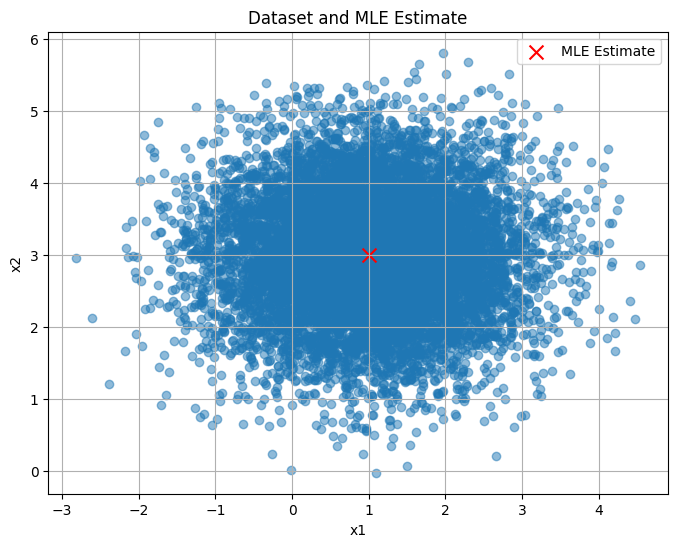

In [28]:
def mle_gaussian(data):
    # For a multivariate Gaussian distribution, the MLE estimate of the mean
    # is the sample mean of the data points
    mu_hat = np.mean(data, axis=0)
    return mu_hat


mu_hat = mle_gaussian(data)
print(f"MLE estimate of μ = {mu_hat}")

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.scatter(mu_hat[0], mu_hat[1], color='red', marker='x', s=100, label='MLE Estimate')
plt.legend()
plt.title('Dataset and MLE Estimate')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# Question 2

In [29]:
def true_function(x):
    return 2 * np.sin(x)

# Generate synthetic data
def generate_data(n_samples=200):
    X = np.random.uniform(0, 3, n_samples)
    noise = np.random.normal(0, np.sqrt(0.25), n_samples)
    y = true_function(X) + noise
    return X, y

np.random.seed(42)

X, y = generate_data(n_samples=200)
X = X.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
eval_points = np.array([0, 0.35, 0.70, 1.05, 1.40, 1.75, 2.10, 2.45, 2.80, 3.14]).reshape(-1, 1)

# KNN Regression

In [30]:
# 1. KNN Regression
k_values = [1, 3, 5, 7, 9]
knn_mse = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    knn_mse.append(mse)

    print(f"KNN (k={k}) Test MSE: {mse:.4f}")

best_k = k_values[np.argmin(knn_mse)]
print(f"Best k value: {best_k}")

knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

knn_predictions = knn_best.predict(eval_points)

KNN (k=1) Test MSE: 0.3422
KNN (k=3) Test MSE: 0.3149
KNN (k=5) Test MSE: 0.3068
KNN (k=7) Test MSE: 0.2853
KNN (k=9) Test MSE: 0.3139
Best k value: 7


# Random Forest Regression

In [31]:
n_trees = [10, 50, 100, 200]
rf_mse = []

for n in n_trees:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rf_mse.append(mse)

    print(f"Random Forest (trees={n}) Test MSE: {mse:.4f}")

best_n = n_trees[np.argmin(rf_mse)]
print(f"Best number of trees: {best_n}")

# Train final Random Forest model with best number of trees
rf_best = RandomForestRegressor(n_estimators=best_n, random_state=42)
rf_best.fit(X_train, y_train)

rf_predictions = rf_best.predict(eval_points)

results = pd.DataFrame({
    'x': eval_points.flatten(),
    'True m0(x)': true_function(eval_points.flatten()),
    'KNN Estimate': knn_predictions,
    'RF Estimate': rf_predictions
})

print("\nModel Predictions at Evaluation Points:")
print(results)

Random Forest (trees=10) Test MSE: 0.2980
Random Forest (trees=50) Test MSE: 0.2984
Random Forest (trees=100) Test MSE: 0.2844
Random Forest (trees=200) Test MSE: 0.2907
Best number of trees: 100

Model Predictions at Evaluation Points:
      x  True m0(x)  KNN Estimate  RF Estimate
0  0.00    0.000000      0.440564     0.125080
1  0.35    0.685796      0.670176     0.782503
2  0.70    1.288435      1.025788     1.019594
3  1.05    1.734846      1.495899     1.376739
4  1.40    1.970899      2.021651     1.933790
5  1.75    1.967972      1.976566     2.255763
6  2.10    1.726419      1.859348     1.833043
7  2.45    1.275529      1.310360     1.646830
8  2.80    0.669976      0.616648     0.594722
9  3.14    0.003185      0.553841     0.752506


# Display Results

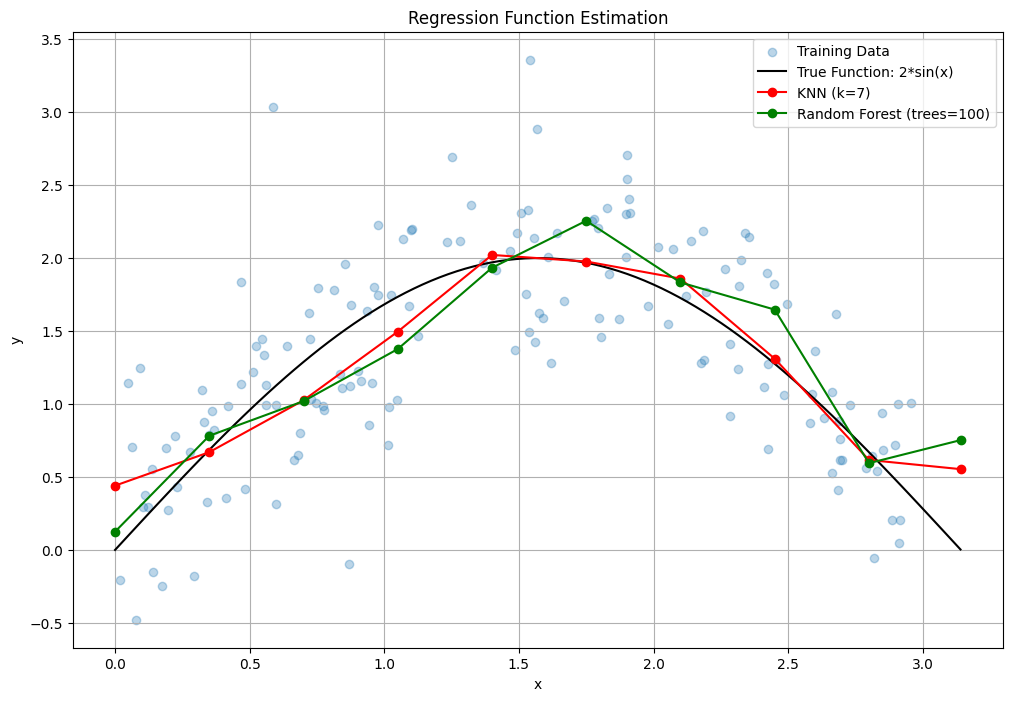


MSE at evaluation points:
KNN: 0.0648
Random Forest: 0.1026

Final Estimates for m0(x) at the given points:
x = 0.00: KNN = 0.4406, RF = 0.1251, True = 0.0000
x = 0.35: KNN = 0.6702, RF = 0.7825, True = 0.6858
x = 0.70: KNN = 1.0258, RF = 1.0196, True = 1.2884
x = 1.05: KNN = 1.4959, RF = 1.3767, True = 1.7348
x = 1.40: KNN = 2.0217, RF = 1.9338, True = 1.9709
x = 1.75: KNN = 1.9766, RF = 2.2558, True = 1.9680
x = 2.10: KNN = 1.8593, RF = 1.8330, True = 1.7264
x = 2.45: KNN = 1.3104, RF = 1.6468, True = 1.2755
x = 2.80: KNN = 0.6166, RF = 0.5947, True = 0.6700
x = 3.14: KNN = 0.5538, RF = 0.7525, True = 0.0032


In [32]:
plt.figure(figsize=(12, 8))

plt.scatter(X_train, y_train, alpha=0.3, label='Training Data')

x_curve = np.linspace(0, 3.14, 100)
y_curve = true_function(x_curve)
plt.plot(x_curve, y_curve, 'k-', label='True Function: 2*sin(x)')

plt.plot(eval_points, knn_predictions, 'ro-', label=f'KNN (k={best_k})')

plt.plot(eval_points, rf_predictions, 'go-', label=f'Random Forest (trees={best_n})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Function Estimation')
plt.legend()
plt.grid(True)
plt.show()

true_values = true_function(eval_points.flatten())
knn_eval_mse = mean_squared_error(true_values, knn_predictions)
rf_eval_mse = mean_squared_error(true_values, rf_predictions)

print(f"\nMSE at evaluation points:")
print(f"KNN: {knn_eval_mse:.4f}")
print(f"Random Forest: {rf_eval_mse:.4f}")

print("\nFinal Estimates for m0(x) at the given points:")
for i, x in enumerate(eval_points.flatten()):
    print(f"x = {x:.2f}: KNN = {knn_predictions[i]:.4f}, RF = {rf_predictions[i]:.4f}, True = {true_function(x):.4f}")